# NodeGAM by SKLearn Interface

This notebook shows how to train the NodeGAM and other GAMs through a sklearn-like interface.

In [19]:
from nodegam.sklearn import NodeGAMRegressor, NodeGAMClassifier
from nodegam.gams.MySpline import MySplineLogisticGAM, MySplineGAM
from nodegam.gams.MyEBM import MyExplainableBoostingClassifier, MyExplainableBoostingRegressor
from nodegam.gams.MyXGB import MyXGBOnehotClassifier, MyXGBOnehotRegressor
from nodegam.gams.MyBagging import MyBaggingClassifier, MyBaggingRegressor
from nodegam.utils import sigmoid_np, average_GAM_dfs
from nodegam.vis_utils import vis_GAM_effects

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## NodeGAMClassifier


We simulate a simple dataset with 3 features sampled from Uniform distributions from -5 to 5 i.e.

$x_0, x_1, x_2 \sim U[-5, 5]$

And the target is simulated as:

$y = x_0^2 + 2 * x_1 + sin(x_2)$

In binary classification, we go through a sigmoid and sample the target:

$\hat{y} = x_0^2 + 2 * x_1 + sin(x_2)$

$y \sim \text{Bern}(sigmoid(\hat{y}))$

We test 4 packages: NodeGAM, Spline, EBM, and XGB.

In [15]:
# Generate dataset
N = 25000
x1 = np.random.uniform(-5, 5, size=N)
x2 = np.random.uniform(-5, 5, size=N)
x3 = np.random.uniform(-5, 5, size=N)

f1 = lambda x: (x) ** 2 - 8
f2 = lambda x: x * 2
f3 = lambda x: np.sin(x)

y_prob = sigmoid_np(f1(x1) + f2(x2) + f3(x3))
# Sample
y = (np.random.random(N) < y_prob).astype(int)

X = pd.DataFrame(np.vstack([x1, x2, x3]).T)
X.shape, y.shape

((25000, 3), (25000,))

Ground Truth GAM graph

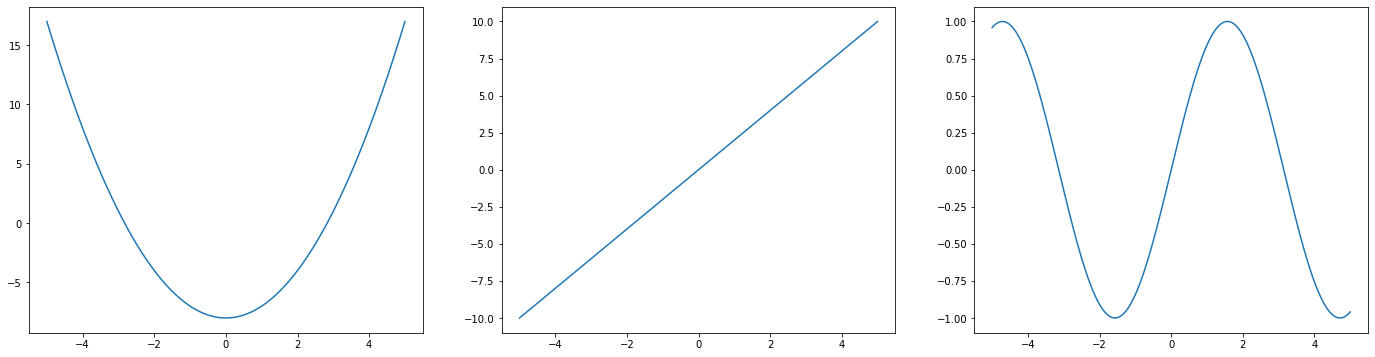

In [16]:
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(x, f1(x))
ax[1].plot(x, f2(x))
ax[2].plot(x, f3(x))

In [17]:
model = NodeGAMClassifier(
    in_features=3,
    objective='logloss',
)

In [20]:
record = model.fit(X, y)

Steps	Train Err	Val Metric (logloss)
100	0.1881	0.2094
200	0.1565	0.2117
300	0.1695	0.179
400	0.1633	0.1863
500	0.1597	0.1767
600	0.1528	0.1702
700	0.1481	0.1782
800	0.1362	0.2071
900	0.1472	0.2417
1000	0.1464	0.2142
1100	0.1462	0.2274
1200	0.14	0.2382
1300	0.1398	0.1901
1400	0.1363	0.1571
1500	0.1423	0.1446
1600	0.1543	0.1438
1700	0.1424	0.1402
1800	0.1286	0.1382
1900	0.1307	0.1363
2000	0.1422	0.1369
2100	0.1379	0.1361
2200	0.1583	0.1359
2300	0.1229	0.1362
2400	0.1319	0.1365
2500	0.1352	0.1367
LR: 1.00e-02 -> 2.00e-03
2600	0.1344	0.1367
2700	0.1307	0.137
2800	0.1402	0.1367
LR: 2.00e-03 -> 4.00e-04
2900	0.125	0.1368
3000	0.1579	0.1367
3100	0.1231	0.1367
LR: 4.00e-04 -> 8.00e-05
3200	0.1311	0.1367
3300	0.1265	0.1369
3400	0.1403	0.1369
LR: 8.00e-05 -> 1.60e-05
3500	0.1581	0.1369
3600	0.1278	0.1369
3700	0.1175	0.1369
LR: 1.60e-05 -> 3.20e-06
3800	0.15	0.1369
3900	0.1358	0.1369
4000	0.1413	0.1369
LR: 3.20e-06 -> 1.00e-06
4100	0.1363	0.1369
4200	0.1467	0.1369
BREAK. There is no improvment f

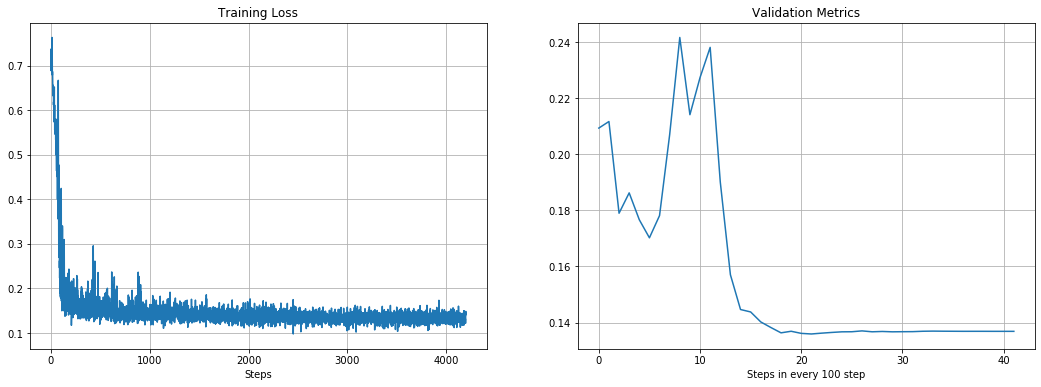

In [21]:
plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
plt.plot(record['train_losses'])
plt.title('Training Loss')
plt.xlabel('Steps')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(record['val_metrics'])
plt.title('Validation Metrics')
plt.xlabel('Steps in every 100 step')
plt.grid()
plt.show()

  0%|          | 0/6 [00:00<?, ?it/s]

bin features 0 with uniq val 24993 to only 256
bin features 1 with uniq val 24994 to only 256
bin features 2 with uniq val 24993 to only 256
Finish "Run values through model" in 121ms


  0%|          | 0/7 [00:00<?, ?it/s]

Finish "Extract values" in 92ms
Finish "Purify interactions to main effects" in 107ms
Finish "Center main effects" in 1ms


100%|██████████| 7/7 [00:00<00:00, 29.91it/s]


Finish "Construct table" in 240ms


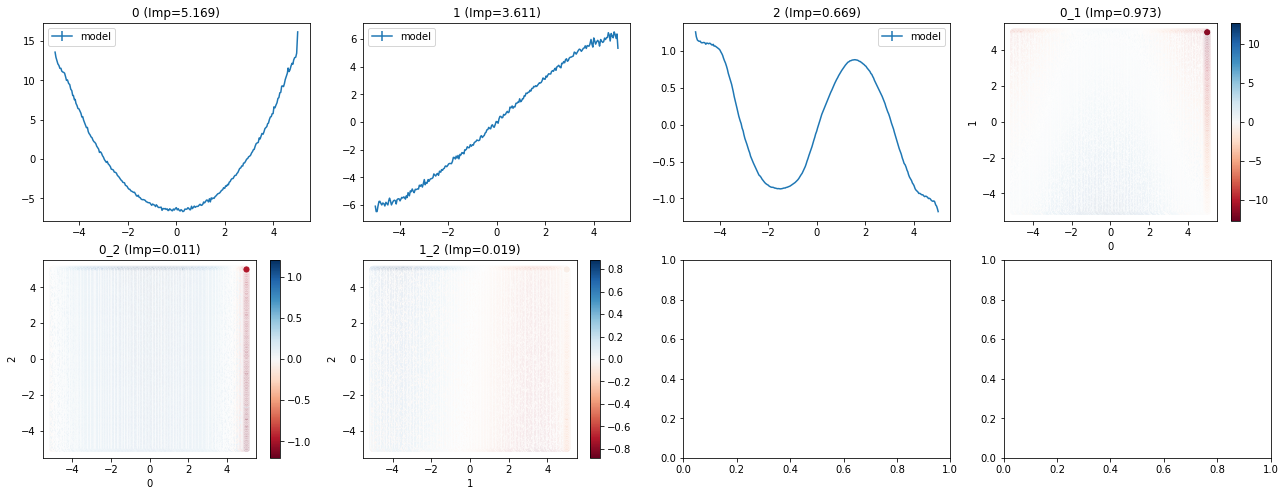

In [22]:
fig, axes, df = model.visualize(X)

Training multiple NodeGAMs with different seeds and take average to get error bar on the graph

In [ ]:
model2 = NodeGAMClassifier(
    in_features=3,
    objective='logloss',
    verbose=0,
    seed=141,
)
record2 = model2.fit(X, y)

In [28]:
df = model.get_GAM_df(X)
df2 = model.get_GAM_df(X)

  0%|          | 0/6 [00:00<?, ?it/s]

bin features 0 with uniq val 24993 to only 256
bin features 1 with uniq val 24994 to only 256
bin features 2 with uniq val 24993 to only 256
Finish "Run values through model" in 147ms


  0%|          | 0/7 [00:00<?, ?it/s]

Finish "Extract values" in 92ms
Finish "Purify interactions to main effects" in 116ms
Finish "Center main effects" in 1ms


  0%|          | 0/6 [00:00<?, ?it/s]

Finish "Construct table" in 388ms
bin features 0 with uniq val 24993 to only 256
bin features 1 with uniq val 24994 to only 256
bin features 2 with uniq val 24993 to only 256
Finish "Run values through model" in 124ms


  0%|          | 0/7 [00:00<?, ?it/s]

Finish "Extract values" in 101ms
Finish "Purify interactions to main effects" in 105ms
Finish "Center main effects" in 1ms


100%|██████████| 7/7 [00:00<00:00, 26.76it/s]

Finish "Construct table" in 271ms


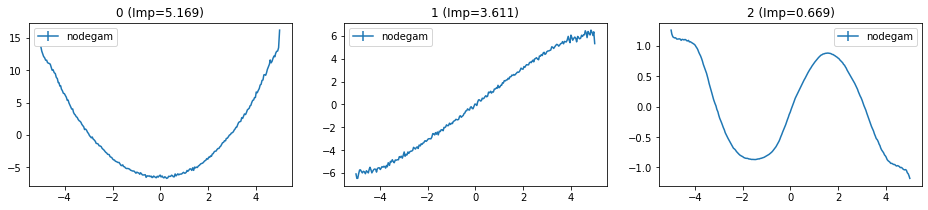

In [40]:
fig, ax = vis_GAM_effects(
    all_dfs={
        'nodegam': average_GAM_dfs([df, df2]),
    },
    top_interactions=0, # Only visualize main effects
    num_cols=3,
)

In [42]:
fig.savefig('../resources/images/example_toy_nodegam.png', dpi=300, bbox_inches='tight')

Ground Truth

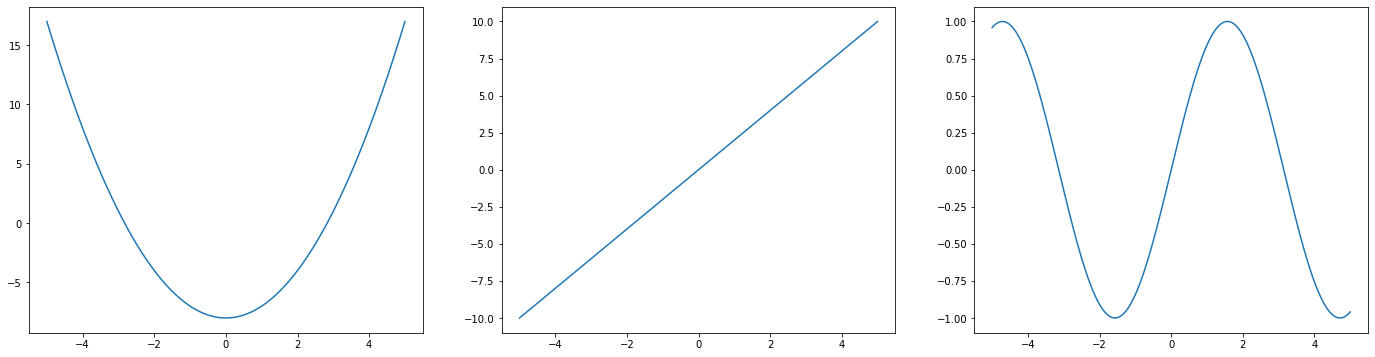

In [8]:
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(x, f1(x))
ax[1].plot(x, f2(x))
ax[2].plot(x, f3(x))

## NodeGAMRegressor

In [9]:
# Generate dataset
N = 25000
x1 = np.random.uniform(-5, 5, size=N)
x2 = np.random.uniform(-5, 5, size=N)
x3 = np.random.uniform(-5, 5, size=N)

f1 = lambda x: (x) ** 2 - 8
f2 = lambda x: x * 2
f3 = lambda x: np.sin(x)

y = f1(x1) + f2(x2) + f3(x3)
X = pd.DataFrame(np.vstack([x1, x2, x3]).T)
X.shape, y.shape

((25000, 3), (25000,))

In [10]:
model = NodeGAMRegressor(
    in_features=3,
)

In [11]:
record = model.fit(X, y)

Normalize y. mean = 0.31971118200964777, std = 9.436361560486022
Steps	Train Err	Val Metric (mse)
100	0.3106	36.97480712283574
200	0.0839	27.178750130946817
300	0.0221	17.671853198852745
400	0.0156	14.974196275821289
500	0.0985	16.199957294507925
600	0.0494	9.092470137971594
700	0.0166	6.078294366965305
800	0.0195	3.9447928657439135
900	0.0113	0.6871479792612096
1000	0.0176	0.6699761318332264
1100	0.0327	0.531289365563486
1200	0.0339	0.4177136651216762
1300	0.0141	0.47946026667486197
1400	0.065	0.5099730727250545
1500	0.0347	0.4543554620274798
LR: 1.00e-02 -> 2.00e-03
1600	0.0219	0.46187406178185475
1700	0.0028	0.25569348999005914
1800	0.0221	0.15916400908374212
1900	0.0103	0.07110312213639133
2000	0.0035	0.04214605100180214
2100	0.0195	0.054172553032664196
2200	0.0142	0.03738822499612974
2300	0.0082	0.027090044627473303
2400	0.005	0.020548492249768735
2500	0.0091	0.023193291623175558
2600	0.0147	0.020368367985109992
2700	0.0117	0.02077906100092235
2800	0.0016	0.018722374627398022
2900

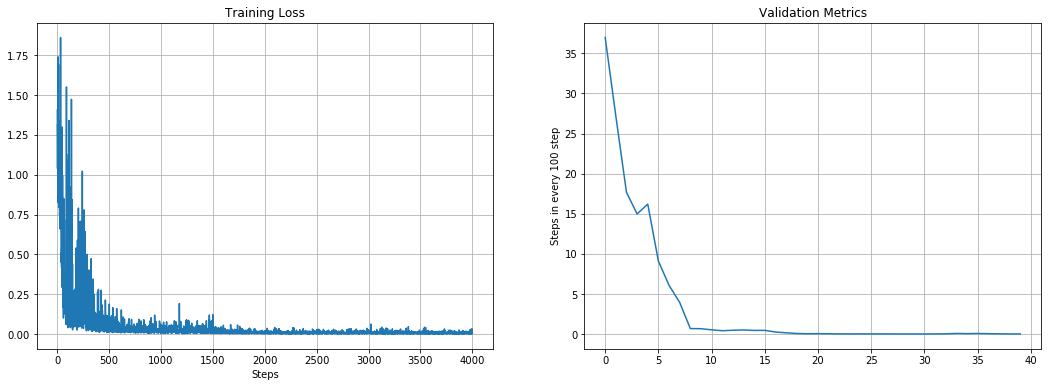

In [12]:
plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
plt.plot(record['train_losses'])
plt.title('Training Loss')
plt.xlabel('Steps')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(record['val_metrics'])
plt.title('Validation Metrics')
plt.ylabel('Steps in every 100 step')
plt.grid()
plt.show()

100%|██████████| 4/4 [00:00<00:00, 9857.35it/s]

bin features 0 with uniq val 24996 to only 256
bin features 1 with uniq val 24992 to only 256
bin features 2 with uniq val 24991 to only 256
Finish "Run values through model" in 75ms
Finish "Extract values" in 11ms
Finish "Purify interactions to main effects" in 0ms
Finish "Center main effects" in 1ms
Finish "Construct table" in 5ms


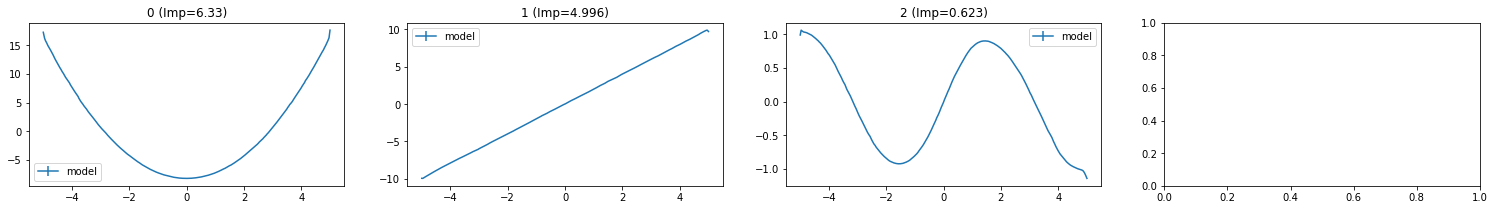

In [13]:
fig, axes, df = model.visualize(X)

Ground Truth

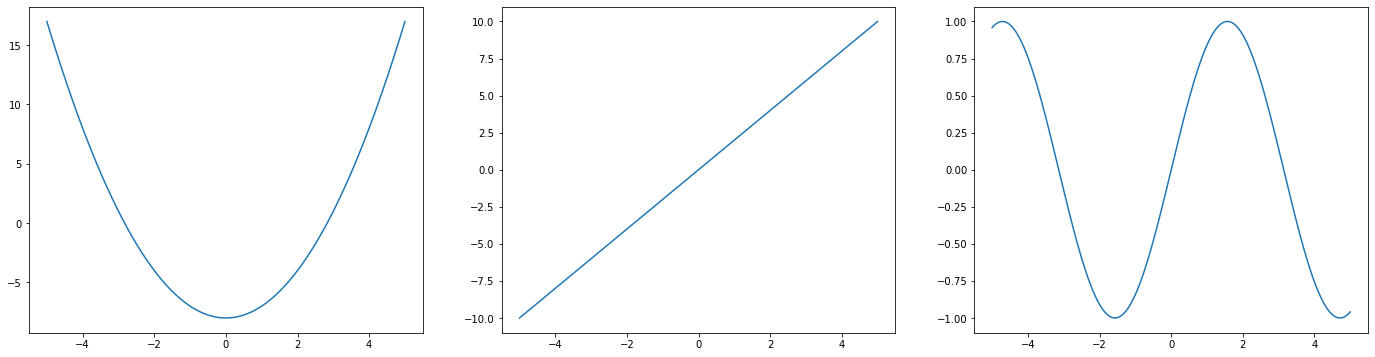

In [14]:
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(x, f1(x))
ax[1].plot(x, f2(x))
ax[2].plot(x, f3(x))

## Baseline Classifiers

In [3]:
# Generate dataset
N = 25000
x1 = np.random.uniform(-5, 5, size=N)
x2 = np.random.uniform(-5, 5, size=N)
x3 = np.random.uniform(-5, 5, size=N)

f1 = lambda x: (x) ** 2 - 8
f2 = lambda x: x * 2
f3 = lambda x: np.sin(x)

y_prob = sigmoid_np(f1(x1) + f2(x2) + f3(x3))
# Sample
y = (np.random.random(N) < y_prob).astype(int)

X = pd.DataFrame(np.vstack([x1, x2, x3]).T, columns=['f0', 'f1', 'f2'])
X.shape, y.shape

((25000, 3), (25000,))

In [4]:
spline = MySplineLogisticGAM()
bagged_spline = MyBaggingClassifier(base_estimator=spline, n_estimators=3)
bagged_spline.fit(X, y)

ebm = MyExplainableBoostingClassifier()
ebm.fit(X, y)

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

search range from 0.001000 to 1000.000000


/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
  6% (1 of 15) |#                        | Elapsed Time: 0:00:03 ETA:   0:00:49/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
 13% (2 of 15) |###                      | Elapsed Time: 0:00:05 ETA:   0:00:34/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_

search range from 0.001000 to 1000.000000


/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
  6% (1 of 15) |#                        | Elapsed Time: 0:00:02 ETA:   0:00:38/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
 13% (2 of 15) |###                      | Elapsed Time: 0:00:03 ETA:   0:00:25/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_

search range from 0.001000 to 1000.000000


/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
  6% (1 of 15) |#                        | Elapsed Time: 0:00:02 ETA:   0:00:37/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
 13% (2 of 15) |###                      | Elapsed Time: 0:00:03 ETA:   0:00:25/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_

MyExplainableBoostingClassifier(feature_names=['f0', 'f1', 'f2', 'f1 x f2',
                                               'f0 x f1', 'f0 x f2'],
                                feature_types=['continuous', 'continuous',
                                               'continuous', 'interaction',
                                               'interaction', 'interaction'])

In [5]:
xgb_gam = MyXGBOnehotClassifier()
bagged_xgb = MyBaggingClassifier(base_estimator=xgb_gam, n_estimators=3)
bagged_xgb.fit(X, y)

/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-

MyBaggingClassifier(base_estimator=<nodegam.gams.MyXGB.MyXGBOnehotClassifier object at 0x7ff638072ba8>,
                    n_estimators=3)

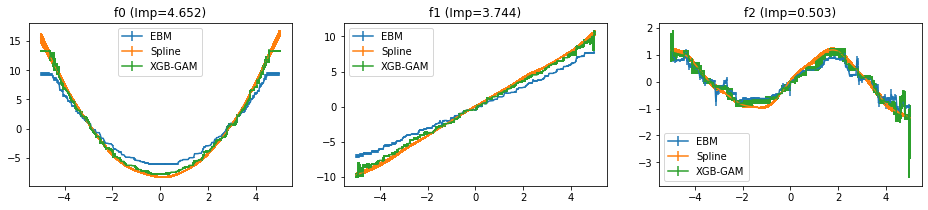

In [34]:
fig, ax = vis_GAM_effects(
    all_dfs={
        'EBM': ebm.get_GAM_df(),
        'Spline': bagged_spline.get_GAM_df(),
        'XGB-GAM': bagged_xgb.get_GAM_df(),
    },
    num_cols=3,
)

In [36]:
fig.savefig('example_gam_plot.png', dpi=300, bbox_inches='tight')

Ground Truth

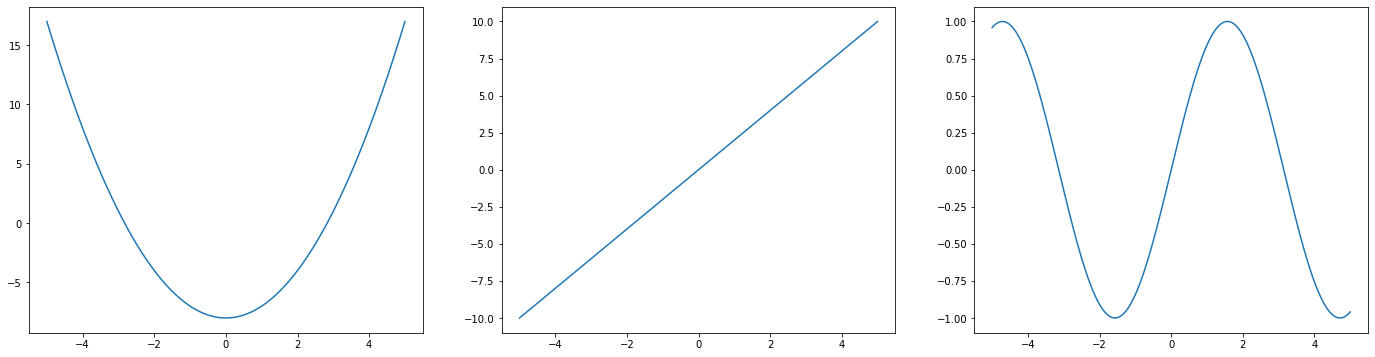

In [9]:
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(x, f1(x))
ax[1].plot(x, f2(x))
ax[2].plot(x, f3(x))

## Baseline Regressors

In [3]:
# Generate dataset
N = 25000
x1 = np.random.uniform(-5, 5, size=N)
x2 = np.random.uniform(-5, 5, size=N)
x3 = np.random.uniform(-5, 5, size=N)

f1 = lambda x: (x) ** 2 - 8
f2 = lambda x: x * 2
f3 = lambda x: np.sin(x)

y = f1(x1) + f2(x2) + f3(x3)
X = pd.DataFrame(np.vstack([x1, x2, x3]).T)
X.shape, y.shape

((25000, 3), (25000,))

In [12]:
# spline = MySplineGAM()
# bagged_spline = MyBaggingRegressor(base_estimator=spline, n_estimators=3)
# bagged_spline.fit(X, y)

ebm = MyExplainableBoostingRegressor()
ebm.fit(X, y)

xgb_gam = MyXGBOnehotRegressor()
bagged_xgb = MyBaggingRegressor(base_estimator=xgb_gam, n_estimators=3)
bagged_xgb.fit(X, y)

MyBaggingRegressor(base_estimator=<nodegam.gams.MyXGB.MyXGBOnehotRegressor object at 0x7f77fd784048>,
                   n_estimators=3)

Somehow Spline Regressor can not work. It produces a wierd error that I can not solve :(

In [5]:
# spline = MySplineGAM()
# bagged_spline = MyBaggingRegressor(base_estimator=spline, n_estimators=3)
# bagged_spline.fit(X, y)

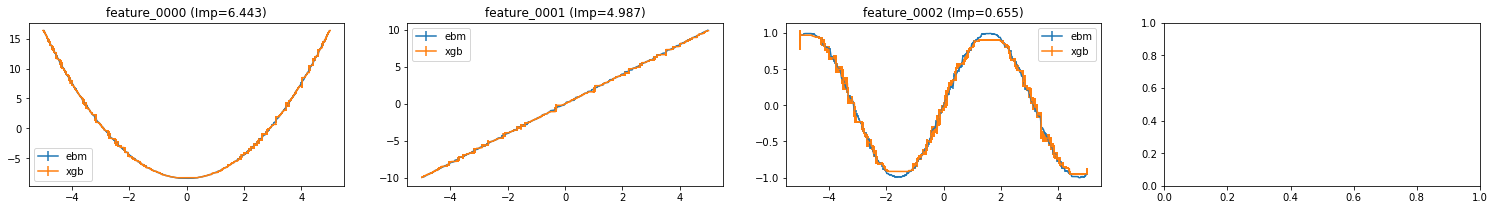

In [13]:
fig, ax = vis_GAM_effects(
    all_dfs={
    'ebm': ebm.get_GAM_df(),
    'xgb': bagged_xgb.get_GAM_df(),
    # 'spline': bagged_spline.get_GAM_df(),
    },
    num_cols=3,
)

Ground Truth

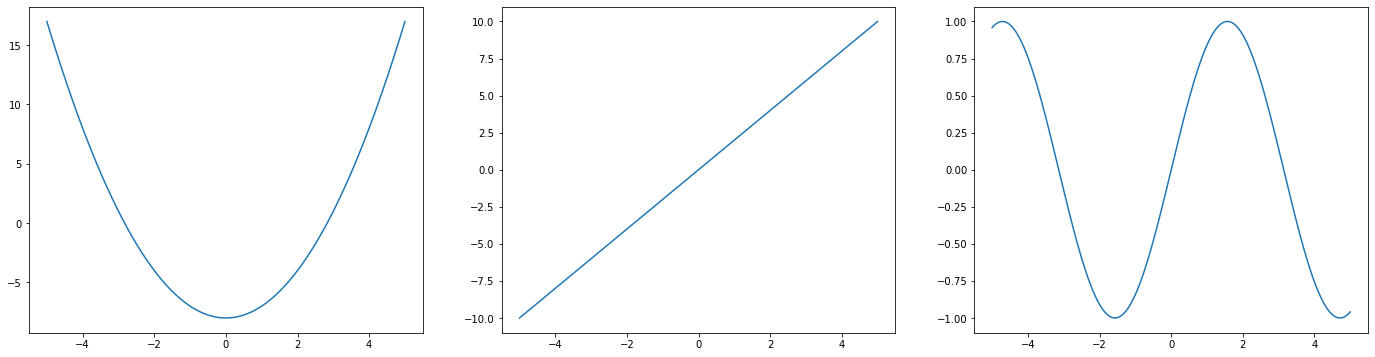

In [14]:
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(x, f1(x))
ax[1].plot(x, f2(x))
ax[2].plot(x, f3(x))